In [36]:
#!pip freeze > ../requests.txt
#!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='ISO8601')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [15]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [21]:
dados_df.dropna(inplace=True)

<Axes: >

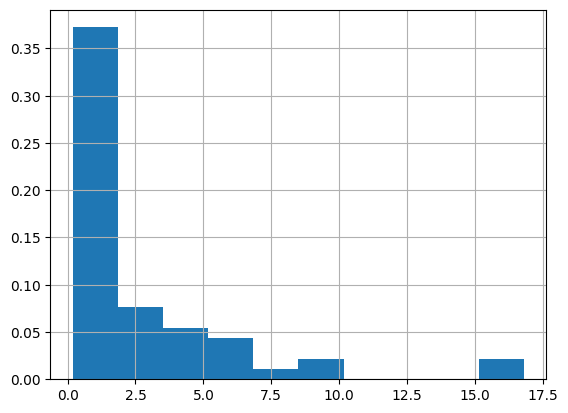

In [25]:
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True)

<Axes: >

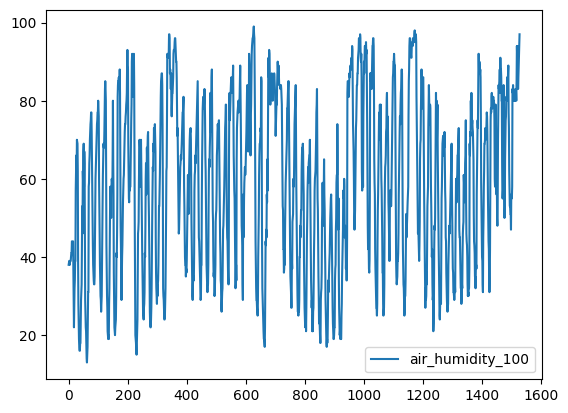

In [26]:
#fig, ax = plt.subplots(figsize=(5,3))
#ax = plt.plot(sensor_df.piezo_charge, sensor_df.air_humidity_100)
#ax = plt.boxplot(sensor_df[sensor_df['num_of_resets'].eq(1)].piezo_charge)
#ax = plt.boxplot(sensor_df[sensor_df['num_of_resets'].eq(3)].piezo_charge)
dados_df[['air_humidity_100']].plot()
#ax = plt.hist(sensor_df.piezo_charge)

In [29]:
dados_df.drop('Datetime – utc', axis=1, inplace=True)

In [31]:
X = dados_df.copy()
X.drop('data', axis=1, inplace=True)
y = X.pop('chuva')

In [40]:
from sklearn.asemble import RandomForestRegressor

ModuleNotFoundError: No module named 'sklearn.asemble'